In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("--- Starting MLR Baseline Model ---")

# =================================================================
# 1. LOAD THE MASTER, CLEANED DATASET
# =================================================================
df = pd.read_csv('../data/processed/model_ready_data.csv', index_col='date', parse_dates=True)
print("Columns loaded into the model:", df.columns.to_list())

# =================================================================
# 2. DEFINE FEATURES (X) AND TARGET (y)
# =================================================================
y = df['target_discharge_t+7']
X = df.drop(columns=['discharge', 'target_discharge_t+7'])

# =================================================================
# 3. SPLIT DATA INTO TRAINING AND TESTING SETS
# =================================================================
# --- THIS IS THE UPDATED LINE ---
split_date = '2005-01-01'
# --------------------------------

X_train = X.loc[X.index < split_date]
y_train = y.loc[y.index < split_date]
X_test = X.loc[X.index >= split_date]
y_test = y.loc[y.index >= split_date]
print(f"\nData successfully split. Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# =================================================================
# 4. INITIALIZE AND TRAIN THE MODEL
# =================================================================
model_mlr = LinearRegression()
print("Training the Multiple Linear Regression model...")
model_mlr.fit(X_train, y_train)
print("✅ Training complete!")

# =================================================================
# 5. MAKE PREDICTIONS
# =================================================================
y_pred_mlr = model_mlr.predict(X_test)
results_mlr = pd.DataFrame({
    'Observed': y_test,
    'Predicted_MLR': y_pred_mlr
}, index=y_test.index)

print("\n--- MLR Model Predictions ---")
print(results_mlr.head())

--- Starting MLR Baseline Model ---
Columns loaded into the model: ['discharge', 'rainfall_mm', 'soi_index', 'discharge_lag_1', 'rainfall_lag_1', 'discharge_lag_2', 'rainfall_lag_2', 'discharge_lag_3', 'rainfall_lag_3', 'discharge_lag_4', 'rainfall_lag_4', 'discharge_lag_5', 'rainfall_lag_5', 'discharge_lag_6', 'rainfall_lag_6', 'discharge_lag_7', 'rainfall_lag_7', 'rainfall_ma_7', 'rainfall_ma_30', 'month', 'target_discharge_t+7']

Data successfully split. Training samples: 8737, Testing samples: 782
Training the Multiple Linear Regression model...
✅ Training complete!

--- MLR Model Predictions ---
            Observed  Predicted_MLR
date                               
2005-01-01    47.388    -910.069213
2005-01-02    46.368    -169.673928
2005-01-03    42.598     -19.059292
2005-01-04    39.093      -2.528690
2005-01-05    37.914      19.881147


In [3]:
!pip install hydroeval

In [4]:
import numpy as np
import hydroeval as he
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the metrics
rmse = np.sqrt(mean_squared_error(results_mlr['Observed'], results_mlr['Predicted_MLR']))
mae = mean_absolute_error(results_mlr['Observed'], results_mlr['Predicted_MLR'])
r2 = r2_score(results_mlr['Observed'], results_mlr['Predicted_MLR'])
nse = he.evaluator(he.nse, results_mlr['Predicted_MLR'], results_mlr['Observed'])[0]

# Print the results
print("--- MLR Model Performance Metrics ---")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} m³/s")
print(f"Mean Absolute Error (MAE): {mae:.2f} m³/s")
print(f"R-squared (R²): {r2:.2f}")
print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.2f}")

--- MLR Model Performance Metrics ---
Root Mean Square Error (RMSE): 132.81 m³/s
Mean Absolute Error (MAE): 67.50 m³/s
R-squared (R²): 0.73
Nash-Sutcliffe Efficiency (NSE): 0.73


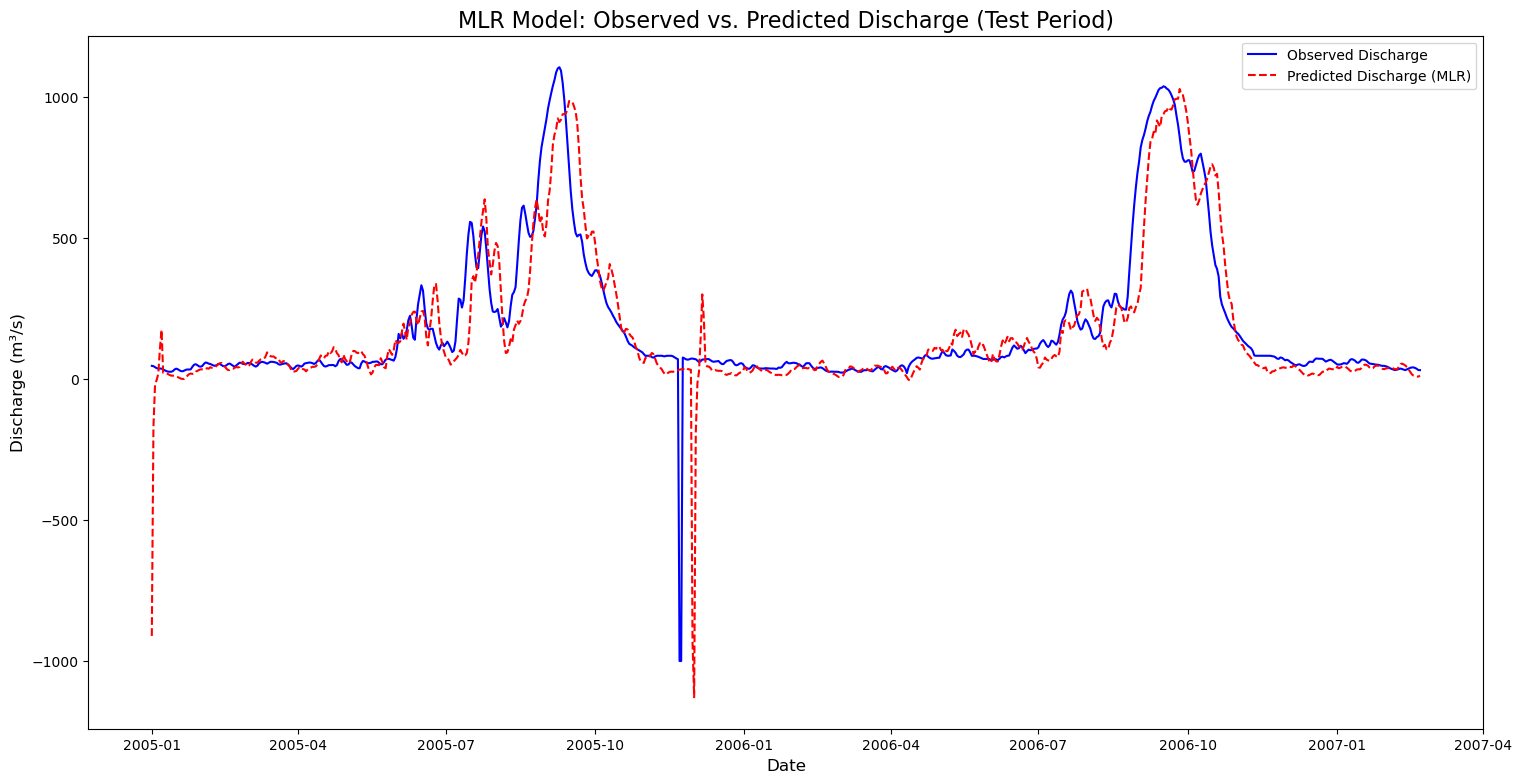

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.plot(results_mlr.index, results_mlr['Observed'], label='Observed Discharge', color='blue')
plt.plot(results_mlr.index, results_mlr['Predicted_MLR'], label='Predicted Discharge (MLR)', color='red', linestyle='--')
plt.title('MLR Model: Observed vs. Predicted Discharge (Test Period)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.legend()
plt.show()

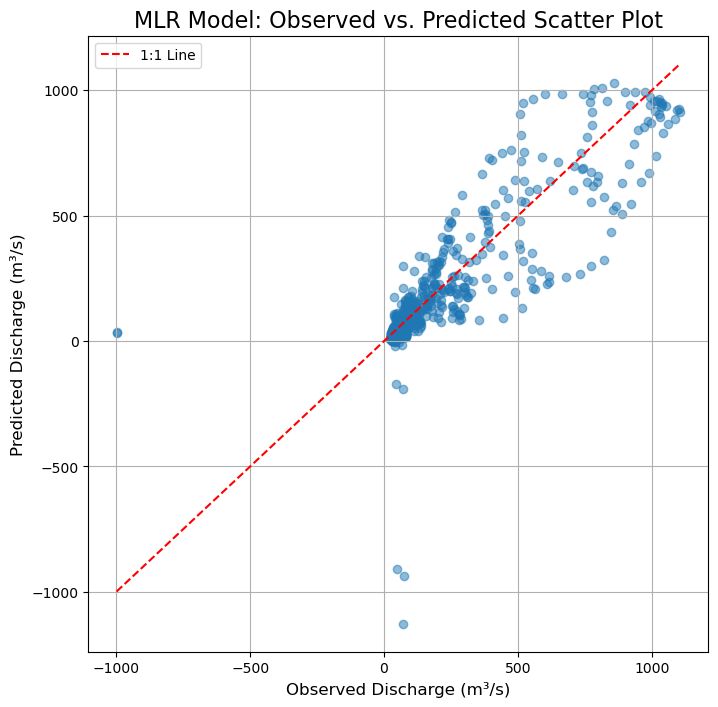

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(results_mlr['Observed'], results_mlr['Predicted_MLR'], alpha=0.5)
plt.plot([min(results_mlr['Observed']), max(results_mlr['Observed'])], 
         [min(results_mlr['Observed']), max(results_mlr['Observed'])], 
         color='red', linestyle='--', label='1:1 Line')
plt.title('MLR Model: Observed vs. Predicted Scatter Plot', fontsize=16)
plt.xlabel('Observed Discharge (m³/s)', fontsize=12)
plt.ylabel('Predicted Discharge (m³/s)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()